# Task Description
    One of the most difficult tasks probably, but try it anyways. Now you guys have both knowledge and experience:)

    I want you to create a class that can solve the Linear regression problem using Gradient Descent method. As, usual the           class should have 2(min) methods:

    1. fit(to train)

    2. predict(to test)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Plotting the Salary vs YearsExperience

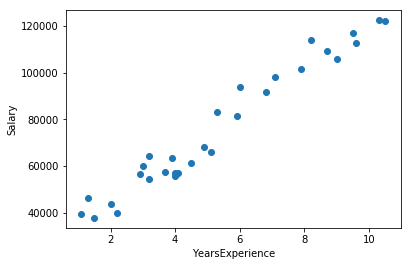

In [152]:
x=data['YearsExperience']
y=data['Salary']
plt.scatter(x,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Splitting the data in X(train,test),y(train,test)


In [5]:
X=data.iloc[:,0].values

In [6]:
X.shape

(30,)

In [7]:
y=data.iloc[:,1].values

In [8]:
y.shape

(30,)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
X_train.shape

(24,)

In [11]:
y_train.shape

(24,)

# Creating a User defined class for Linear Regression:

In [147]:
class LinearRegression:
    def __init__(self):
        self.m=1
        self.b=0
    def diff(self,x,y):
        diffb=0
        diffm=0
        for i in range(0,24): 
            eq=(self.m*x[i]+self.b)-y[i]
            diffb=diffb+2*eq
            diffm=diffm+2*eq*x[i]
        return diffb,diffm
    def fit(self,data,x,y):
        line=[]
        for i in range(0,999):
            ssb,ssm=self.diff(x,y)
            lr=0.001
            stepb=ssb*lr
            stepm=ssm*lr
            old_b=self.b
            old_m=self.m
            new_b=self.b-stepb
            new_m=self.m-stepm
            if(abs(stepb)<=0.001 and abs(stepm)<=0.001):
                break
            else:
                self.b=new_b
                self.m=new_m          
        for j in range(0,24):
            y1=self.m*x[j]+self.b
            line.append(y1)
        m1=data['YearsExperience']
        n1=data['Salary']    
        plt.plot(x,line)
        plt.scatter(m1,n1)
        plt.xlabel("Years")
        plt.ylabel("Salary")
        plt.title("Best Fit Line")
        plt.show()
    def predict(self,x,y):
        y_pred=[]
        for i in range(len(x)):
            a=self.m*x[i]+self.b
            y_pred.append(a)
        from sklearn.metrics import r2_score
        print("The accuracy is:",r2_score(y_test,y_pred))
        new=pd.DataFrame()
        new["YearsExperience"]=x
        new["Salary"]=y
        new["Salary_predicted"]=y_pred
        print(new)   

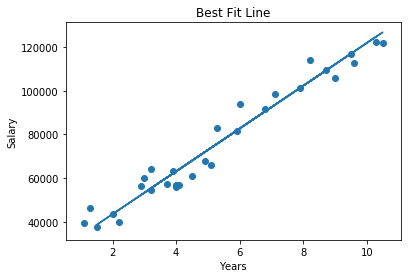

The accuracy is: 0.956089064704309
   YearsExperience    Salary  Salary_predicted
0              3.2   54445.0      55347.864415
1              5.1   66029.0      73920.718385
2              9.6  112635.0     117909.056735
3              1.1   39343.0      34819.973185
4              1.3   46205.0      36775.010445
5              7.9  101302.0     101291.240025


In [150]:
lr=LinearRegression()
lr.fit(data,X_train,y_train)
lr.predict(X_test,y_test)